In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder


Load data:

In [31]:
df = pd.read_csv('../EDA/EPL_2019_2022.csv')

In [32]:
pd.set_option('display.max_rows', 500)
def get_distinct_examples(col, n=5):
    return col.loc[~col.duplicated()].tolist()[:n]

summary = pd.DataFrame({
    'Column Name': df.columns,
    'Type': df.dtypes,
    '% of Missing': df.isnull().mean() * 100,
    'Distinct Values': df.nunique(),
    'Examples of Distinct Values': df.apply(lambda col: get_distinct_examples(col))
})
summary.reset_index()

,index,Column Name,Type,% of Missing,Distinct Values,Examples of Distinct Values
0,Div,Div,object,0.000000,1,[E0]
1,Date,Date,object,0.000000,373,"[2019-08-09, 2019-08-10, 2019-08-11, 2019-08-1..."
2,Time,Time,object,0.000000,20,"[20:00, 12:30, 15:00, 17:30, 14:00]"
3,HomeTeam,HomeTeam,object,0.000000,24,"[Liverpool, West Ham, Bournemouth, Burnley, Cr..."
4,AwayTeam,AwayTeam,object,0.000000,24,"[Norwich, Man City, Sheffield United, Southamp..."
5,FTHG,FTHG,int64,0.000000,10,"[4, 0, 1, 3, 2]"
6,FTAG,FTAG,int64,0.000000,9,"[1, 5, 0, 3, 2]"
7,FTR,FTR,int64,0.000000,2,"[1, 0]"
8,HTHG,HTHG,int64,0.000000,6,"[4, 0, 1, 2, 5]"
9,HTAG,HTAG,int64,0.000000,6,"[0, 1, 2, 3, 5]"


In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season,FTR_ORG
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,1,4,0,...,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99,2019-2020,H
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,0,0,1,...,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92,2019-2020,A
2,E0,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,0,0,0,...,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92,2019-2020,D
3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,1,0,0,...,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02,2019-2020,H
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,0,0,0,...,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93,2019-2020,D


In [35]:
df['FTR_ORG']

0       H
1       A
2       D
3       H
4       D
       ..
1135    H
1136    H
1137    H
1138    H
1139    A
Name: FTR_ORG, Length: 1140, dtype: object

Get weather data:

In [18]:
df['HomeTeam'].unique()

array(['Liverpool', 'West Ham', 'Bournemouth', 'Burnley',
       'Crystal Palace', 'Watford', 'Tottenham', 'Leicester', 'Newcastle',
       'Man United', 'Arsenal', 'Aston Villa', 'Brighton', 'Everton',
       'Norwich', 'Southampton', 'Man City', 'Sheffield United',
       'Chelsea', 'Wolves', 'Fulham', 'West Brom', 'Leeds', 'Brentford'],
      dtype=object)

In [4]:
team_to_stadium = {
    'Liverpool': 'Anfield',
    'West Ham': 'London Stadium',
    'Bournemouth': 'Vitality Stadium',
    'Burnley': 'Turf Moor',
    'Crystal Palace': 'Selhurst Park',
    'Watford': 'Vicarage Road',
    'Tottenham': 'Tottenham Hotspur Stadium',
    'Leicester': 'King Power Stadium',
    'Newcastle': 'St. James\' Park',
    'Man United': 'Old Trafford',
    'Arsenal': 'Emirates Stadium',
    'Aston Villa': 'Villa Park',
    'Man City': 'Etihad Stadium',
    'Brighton': 'Amex Stadium',
    'Norwich': 'Carrow Road',
    'Southampton': 'St Mary\'s Stadium',
    'Everton': 'Goodison Park',
    'Sheffield United': 'Bramall Lane',
    'Chelsea': 'Stamford Bridge',
    'Wolves': 'Molineux Stadium',
    'Fulham': 'Craven Cottage',
    'West Brom': 'The Hawthorns',
    'Leeds': 'Elland Road',
    'Brentford': 'Brentford Community Stadium'
}

In [5]:
stadium_to_coords = {
    'Anfield': (53.4308, -2.9608),
    'London Stadium': (51.5387, -0.0166),
    'Vitality Stadium': (50.7352, -1.8383),
    'Turf Moor': (53.7890, -2.2302),
    'Selhurst Park': (51.3983, -0.0855),
    'Vicarage Road': (51.6498, -0.4017),
    'Tottenham Hotspur Stadium': (51.6043, -0.0674),
    'King Power Stadium': (52.6204, -1.1422),
    'St. James\' Park': (54.9756, -1.6217),
    'Old Trafford': (53.4631, -2.2913),
    'Emirates Stadium': (51.5549, -0.1084),
    'Villa Park': (52.5092, -1.8849),
    'Etihad Stadium': (53.4831, -2.2003),
    'Amex Stadium': (50.8616, -0.0837),
    'Carrow Road': (52.6221, 1.3086),
    'St Mary\'s Stadium': (50.9058, -1.3911),
    'Goodison Park': (53.4388, -2.9663),
    'Bramall Lane': (53.3703, -1.4714),
    'Stamford Bridge': (51.4817, -0.1910),
    'Molineux Stadium': (52.5902, -2.1304),
    'Craven Cottage': (51.4753, -0.2216),
    'The Hawthorns': (52.5091, -1.9639),
    'Elland Road': (53.7776, -1.5724),
    'Brentford Community Stadium': (51.4908, -0.2887)
}

In [19]:
def add_stadium_lat_long(df):
    """Add stadium name and coordinates to the dataframe based on HomeTeam."""
    df['Stadium'] = df['HomeTeam'].map(team_to_stadium).fillna('Unknown Stadium')
    df['Longitude'] = df['Stadium'].map(lambda x: stadium_to_coords.get(x, (None, None))[1])
    df['Latitude'] = df['Stadium'].map(lambda x: stadium_to_coords.get(x, (None, None))[0])
    return df

In [37]:
df_generated = add_stadium_lat_long(df)

In [ ]:
import requests
import time

# Sample API key (replace with your own)
API_KEY = 'bc067b9f91e829eae4aa92b4f319acd3'
BASE_URL = 'https://api.openweathermap.org/data/3.0/onecall/timemachine'

# Function to get weather data for a specific location and date
def get_weather(lat, lon, dt):
    params = {
        'lat': lat,
        'lon': lon,
        'dt': dt,
        'appid': API_KEY,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()


# Assuming the date is in the format 'yyyy-mm-dd' and time is 'hh:mm'
df_generated['datetime'] = pd.to_datetime(df_generated['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_generated['Time'])

# Convert the 'datetime' to a Unix timestamp
df_generated['timestamp'] = df_generated['datetime'].apply(lambda x: int(x.timestamp()))

weather_data = []

for index, row in df_generated.iterrows():

    lat = row['Latitude']
    lon = row['Longitude']
    timestamp = row['timestamp']
    weather = get_weather(lat, lon, timestamp)
    weather_data.append(weather)


df_generated['Weather'] = weather_data

# Save the updated DataFrame with weather data to a new CSV file
df_generated.to_csv('EPL_with_weather_full.csv', index=False)

In [22]:
df_generated.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season,Stadium,Longitude,Latitude,datetime,timestamp
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,1,4,0,...,1.99,2.07,1.90,1.99,2019-2020,Anfield,-2.9608,53.4308,2019-08-09 20:00:00,1565380800
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,0,0,1,...,2.07,1.98,1.97,1.92,2019-2020,London Stadium,-0.0166,51.5387,2019-08-10 12:30:00,1565440200
2,E0,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,0,0,0,...,2.00,1.96,1.96,1.92,2019-2020,Vitality Stadium,-1.8383,50.7352,2019-08-10 15:00:00,1565449200
3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,1,0,0,...,1.90,2.07,1.86,2.02,2019-2020,Turf Moor,-2.2302,53.7890,2019-08-10 15:00:00,1565449200
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,0,0,0,...,2.03,2.08,1.96,1.93,2019-2020,Selhurst Park,-0.0855,51.3983,2019-08-10 15:00:00,1565449200


Load saved file:

In [26]:
df.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season,Stadium,Longitude,Latitude,datetime,timestamp
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,1,4,0,...,1.99,2.07,1.90,1.99,2019-2020,Anfield,-2.9608,53.4308,2019-08-09 20:00:00,1565380800
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,0,0,1,...,2.07,1.98,1.97,1.92,2019-2020,London Stadium,-0.0166,51.5387,2019-08-10 12:30:00,1565440200
2,E0,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,0,0,0,...,2.00,1.96,1.96,1.92,2019-2020,Vitality Stadium,-1.8383,50.7352,2019-08-10 15:00:00,1565449200
3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,1,0,0,...,1.90,2.07,1.86,2.02,2019-2020,Turf Moor,-2.2302,53.7890,2019-08-10 15:00:00,1565449200
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,0,0,0,...,2.03,2.08,1.96,1.93,2019-2020,Selhurst Park,-0.0855,51.3983,2019-08-10 15:00:00,1565449200


In [24]:
df_generated = pd.read_csv('EPL_with_weather_full.csv')


In [25]:
df_generated.head(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Latitude,datetime,timestamp,Weather,Temperature,Humidity,WindDirection,Precipitation,WindSpeed,WeatherCode
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,1,4,0,...,53.4308,2019-08-09 20:00:00,1565380800,"{'lat': 53.4308, 'lon': -2.9608, 'timezone': '...",18.60,77,180,0.00,7.70,Clouds
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,0,0,1,...,51.5387,2019-08-10 12:30:00,1565440200,"{'lat': 51.5387, 'lon': -0.0166, 'timezone': '...",21.39,63,230,0.00,10.30,Clouds
2,E0,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,0,0,0,...,50.7352,2019-08-10 15:00:00,1565449200,"{'lat': 50.7352, 'lon': -1.8383, 'timezone': '...",19.14,74,250,0.00,12.90,Clouds
3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,1,0,0,...,53.7890,2019-08-10 15:00:00,1565449200,"{'lat': 53.789, 'lon': -2.2302, 'timezone': 'E...",16.33,96,236,2.29,7.05,Rain
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,0,0,0,...,51.3983,2019-08-10 15:00:00,1565449200,"{'lat': 51.3983, 'lon': -0.0855, 'timezone': '...",20.56,66,230,0.00,12.30,Rain


In [ ]:
import ast
def extract_weather_info(weather_str):
    try:
        # Convert the string to a dictionary
        weather_json = ast.literal_eval(weather_str)
        
        # Extract relevant data
        if weather_json and 'data' in weather_json and len(weather_json['data']) > 0:
            data = weather_json['data'][0]
            temp = data.get('temp')
            humidity = data.get('humidity')
            wind_speed = data.get('wind_speed')
            wind_direction = data.get('wind_deg')
            weather_code = data['weather'][0]['main'] if 'weather' in data and len(data['weather']) > 0 else None
            precipitation = data['rain'].get('1h') if 'rain' in data else 0
            return temp, humidity, wind_direction, precipitation, wind_speed, weather_code
    except (ValueError, SyntaxError):
        # Handle cases where the string cannot be parsed
        return None, None, None, None, None, None
    return None, None, None, None, None, None


In [ ]:
df_generated[['Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 'WeatherCode']] = df_generated['Weather'].apply(lambda x: pd.Series(extract_weather_info(x)))


Save file again:

In [69]:
df_generated.to_csv('EPL_with_weather_full.csv', index=False)

Reload from files:

In [38]:
df_generated = pd.read_csv('EPL_with_weather_full.csv')

In [39]:
df_generated['Date'] = pd.to_datetime(df_generated['Date'])

Get the original value of target feature from raw dataset:

In [40]:
df_generated = df_generated.merge(df[['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTR_ORG']],
                                  on=['Date', 'Time', 'HomeTeam', 'AwayTeam'],
                                  how='left')

In [41]:
df_generated[['FTR','FTR_ORG']]

,FTR,FTR_ORG
0,1,H
1,0,A
2,0,D
3,1,H
4,0,D
...,...,...
1135,0,A
1136,1,H
1137,1,H
1138,1,H


In [42]:
df_generated['WeatherCode'].value_counts()

Clouds     577
Rain       289
Clear      212
Drizzle     23
Mist        16
Haze        10
Fog          8
Snow         5
Name: WeatherCode, dtype: int64

In [49]:
df_2019_2020 = df_generated[df_generated['season'].isin(['2019-2020', '2020-2021'])]
df_2021 = df_generated[df_generated['season'] == '2021-2022']

In [58]:
def calculate_prv_stats(df):
    # Ensure Date column is in datetime format and sort the dataframe by date
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date').reset_index(drop=True)

    # Create new columns to store the statistics
    df['Home_Prv_FTR'] = None
    df['Home_Prv_FTHG'] = None
    df['Home_Prv_HS'] = None
    df['Home_Prv_HST'] = None
    df['Home_Prv_HF'] = None
    df['Home_Prv_HC'] = None
    df['Home_Prv_HY'] = None
    df['Home_Prv_HR'] = None

    df['Home_Avg_3_FTHG'] = None
    df['Home_Avg_3_HS'] = None
    df['Home_Avg_3_HST'] = None
    df['Home_Avg_3_HF'] = None
    df['Home_Avg_3_HC'] = None
    df['Home_Avg_3_HY'] = None
    df['Home_Avg_3_HR'] = None

    df['Home_Prv_3_Win'] = None  # New feature

    df['Away_Prv_FTR'] = None
    df['Away_Prv_FTAG'] = None
    df['Away_Prv_AS'] = None
    df['Away_Prv_AST'] = None
    df['Away_Prv_AF'] = None
    df['Away_Prv_AC'] = None
    df['Away_Prv_AY'] = None
    df['Away_Prv_AR'] = None

    df['Away_Avg_3_FTAG'] = None
    df['Away_Avg_3_AS'] = None
    df['Away_Avg_3_AST'] = None
    df['Away_Avg_3_AF'] = None
    df['Away_Avg_3_AC'] = None
    df['Away_Avg_3_AY'] = None
    df['Away_Avg_3_AR'] = None

    df['Away_Prv_3_Win'] = None  # New feature

    # Iterate through each row to calculate statistics
    for index, row in df.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']

        # Get all previous games for the home team (either as home or away)
        home_prev_games = df[((df['HomeTeam'] == home_team) | (df['AwayTeam'] == home_team)) & (df['Date'] < row['Date'])]

        if not home_prev_games.empty:
            last_home_game = home_prev_games.iloc[-1]
            df.at[index, 'Home_Prv_FTR'] = last_home_game['FTR']
            df.at[index, 'Home_Prv_FTHG'] = last_home_game['FTHG'] if last_home_game['HomeTeam'] == home_team else last_home_game['FTAG']
            df.at[index, 'Home_Prv_HS'] = last_home_game['HS'] if last_home_game['HomeTeam'] == home_team else last_home_game['AS']
            df.at[index, 'Home_Prv_HST'] = last_home_game['HST'] if last_home_game['HomeTeam'] == home_team else last_home_game['AST']
            df.at[index, 'Home_Prv_HF'] = last_home_game['HF'] if last_home_game['HomeTeam'] == home_team else last_home_game['AF']
            df.at[index, 'Home_Prv_HC'] = last_home_game['HC'] if last_home_game['HomeTeam'] == home_team else last_home_game['AC']
            df.at[index, 'Home_Prv_HY'] = last_home_game['HY'] if last_home_game['HomeTeam'] == home_team else last_home_game['AY']
            df.at[index, 'Home_Prv_HR'] = last_home_game['HR'] if last_home_game['HomeTeam'] == home_team else last_home_game['AR']

            if len(home_prev_games) >= 3:
                last_3_home_games = home_prev_games.tail(3)
                df.at[index, 'Home_Avg_3_FTHG'] = last_3_home_games.apply(lambda x: x['FTHG'] if x['HomeTeam'] == home_team else x['FTAG'], axis=1).mean()
                df.at[index, 'Home_Avg_3_HS'] = last_3_home_games.apply(lambda x: x['HS'] if x['HomeTeam'] == home_team else x['AS'], axis=1).mean()
                df.at[index, 'Home_Avg_3_HST'] = last_3_home_games.apply(lambda x: x['HST'] if x['HomeTeam'] == home_team else x['AST'], axis=1).mean()
                df.at[index, 'Home_Avg_3_HF'] = last_3_home_games.apply(lambda x: x['HF'] if x['HomeTeam'] == home_team else x['AF'], axis=1).mean()
                df.at[index, 'Home_Avg_3_HC'] = last_3_home_games.apply(lambda x: x['HC'] if x['HomeTeam'] == home_team else x['AC'], axis=1).mean()
                df.at[index, 'Home_Avg_3_HY'] = last_3_home_games.apply(lambda x: x['HY'] if x['HomeTeam'] == home_team else x['AY'], axis=1).mean()
                df.at[index, 'Home_Avg_3_HR'] = last_3_home_games.apply(lambda x: x['HR'] if x['HomeTeam'] == home_team else x['AR'], axis=1).mean()

                # Count number of wins for the home team in the last 3 matches
                df.at[index, 'Home_Prv_3_Win'] = last_3_home_games.apply(
                    lambda x: (x['FTR_ORG'] == 'H' and x['HomeTeam'] == home_team) or (x['FTR_ORG'] == 'A' and x['AwayTeam'] == home_team),
                    axis=1
                ).sum()

        # Get all previous games for the away team (either as home or away)
        away_prev_games = df[((df['HomeTeam'] == away_team) | (df['AwayTeam'] == away_team)) & (df['Date'] < row['Date'])]

        if not away_prev_games.empty:
            last_away_game = away_prev_games.iloc[-1]
            df.at[index, 'Away_Prv_FTR'] = last_away_game['FTR']
            df.at[index, 'Away_Prv_FTAG'] = last_away_game['FTAG'] if last_away_game['AwayTeam'] == away_team else last_away_game['FTHG']
            df.at[index, 'Away_Prv_AS'] = last_away_game['AS'] if last_away_game['AwayTeam'] == away_team else last_away_game['HS']
            df.at[index, 'Away_Prv_AST'] = last_away_game['AST'] if last_away_game['AwayTeam'] == away_team else last_away_game['HST']
            df.at[index, 'Away_Prv_AF'] = last_away_game['AF'] if last_away_game['AwayTeam'] == away_team else last_away_game['HF']
            df.at[index, 'Away_Prv_AC'] = last_away_game['AC'] if last_away_game['AwayTeam'] == away_team else last_away_game['HC']
            df.at[index, 'Away_Prv_AY'] = last_away_game['AY'] if last_away_game['AwayTeam'] == away_team else last_away_game['HY']
            df.at[index, 'Away_Prv_AR'] = last_away_game['AR'] if last_away_game['AwayTeam'] == away_team else last_away_game['HR']

            if len(away_prev_games) >= 3:
                last_3_away_games = away_prev_games.tail(3)
                df.at[index, 'Away_Avg_3_FTAG'] = last_3_away_games.apply(lambda x: x['FTAG'] if x['AwayTeam'] == away_team else x['FTHG'], axis=1).mean()
                df.at[index, 'Away_Avg_3_AS'] = last_3_away_games.apply(lambda x: x['AS'] if x['AwayTeam'] == away_team else x['HS'], axis=1).mean()
                df.at[index, 'Away_Avg_3_AST'] = last_3_away_games.apply(lambda x: x['AST'] if x['AwayTeam'] == away_team else x['HST'], axis=1).mean()
                df.at[index, 'Away_Avg_3_AF'] = last_3_away_games.apply(lambda x: x['AF'] if x['AwayTeam'] == away_team else x['HF'], axis=1).mean()
                df.at[index, 'Away_Avg_3_AC'] = last_3_away_games.apply(lambda x: x['AC'] if x['AwayTeam'] == home_team else x['HC'], axis=1).mean()
                df.at[index, 'Away_Avg_3_AY'] = last_3_away_games.apply(lambda x: x['AY'] if x['AwayTeam'] == home_team else x['HY'], axis=1).mean()
                df.at[index, 'Away_Avg_3_AR'] = last_3_away_games.apply(lambda x: x['AR'] if x['AwayTeam'] == home_team else x['HR'], axis=1).mean()

                # Count number of wins for the away team in the last 3 matches
                df.at[index, 'Away_Prv_3_Win'] = last_3_away_games.apply(
                    lambda x: (x['FTR_ORG'] == 'H' and x['HomeTeam'] == away_team) or (x['FTR_ORG'] == 'A' and x['AwayTeam'] == away_team),
                    axis=1
                ).sum()
    
    return df

In [59]:
# Assuming 'df' is your original DataFrame
df_2019_2020 = calculate_prv_stats(df_2019_2020)
df_2021 = calculate_prv_stats(df_2021)

In [60]:
df_2021['Away_Prv_3_Win'].value_counts()

1    126
0     99
2     95
3     30
Name: Away_Prv_3_Win, dtype: int64

In [30]:
df_2019_2020[(df_2019_2020['Away_Avg_3_FTAG'].isna()) |(df_2019_2020['Away_Avg_3_FTAG'].isna())]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Away_Prv_AC,Away_Prv_AY,Away_Prv_AR,Away_Avg_3_FTAG,Away_Avg_3_AS,Away_Avg_3_AST,Away_Avg_3_AF,Away_Avg_3_AC,Away_Avg_3_AY,Away_Avg_3_AR
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,1,4,0,...,None,None,None,None,None,None,None,None,None,None
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,0,0,1,...,None,None,None,None,None,None,None,None,None,None
2,E0,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,0,0,0,...,None,None,None,None,None,None,None,None,None,None
3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,1,0,0,...,None,None,None,None,None,None,None,None,None,None
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
5,E0,2019-08-10,15:00,Watford,Brighton,0,3,0,0,1,...,None,None,None,None,None,None,None,None,None,None
6,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,1,0,1,...,None,None,None,None,None,None,None,None,None,None
7,E0,2019-08-11,14:00,Leicester,Wolves,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
8,E0,2019-08-11,14:00,Newcastle,Arsenal,0,1,0,0,0,...,None,None,None,None,None,None,None,None,None,None
9,E0,2019-08-11,16:30,Man United,Chelsea,4,0,1,1,0,...,None,None,None,None,None,None,None,None,None,None


In [32]:
df_2021[(df_2021['Away_Avg_3_FTAG'].isna()) |(df_2021['Away_Avg_3_FTAG'].isna())]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Away_Prv_AC,Away_Prv_AY,Away_Prv_AR,Away_Avg_3_FTAG,Away_Avg_3_AS,Away_Avg_3_AST,Away_Avg_3_AF,Away_Avg_3_AC,Away_Avg_3_AY,Away_Avg_3_AR
0,E0,2021-08-13,20:00,Brentford,Arsenal,2,0,1,1,0,...,None,None,None,None,None,None,None,None,None,None
1,E0,2021-08-14,15:00,Everton,Southampton,3,1,1,0,1,...,None,None,None,None,None,None,None,None,None,None
2,E0,2021-08-14,17:30,Norwich,Liverpool,0,3,0,0,1,...,None,None,None,None,None,None,None,None,None,None
3,E0,2021-08-14,15:00,Burnley,Brighton,1,2,0,1,0,...,None,None,None,None,None,None,None,None,None,None
4,E0,2021-08-14,15:00,Watford,Aston Villa,3,2,1,2,0,...,None,None,None,None,None,None,None,None,None,None
5,E0,2021-08-14,12:30,Man United,Leeds,5,1,1,1,0,...,None,None,None,None,None,None,None,None,None,None
6,E0,2021-08-14,15:00,Chelsea,Crystal Palace,3,0,1,2,0,...,None,None,None,None,None,None,None,None,None,None
7,E0,2021-08-14,15:00,Leicester,Wolves,1,0,1,1,0,...,None,None,None,None,None,None,None,None,None,None
8,E0,2021-08-15,14:00,Newcastle,West Ham,2,4,0,2,1,...,None,None,None,None,None,None,None,None,None,None
9,E0,2021-08-15,16:30,Tottenham,Man City,1,0,1,0,0,...,None,None,None,None,None,None,None,None,None,None


In [61]:
def add_rest_columns(df):
    # Sort the dataframe by date
    df = df.sort_values(by='Date')
    
    # Dictionary to store the last few game dates for each team
    last_game_dates = {}
    
    # Lists to store the rest days and average rest days for home and away teams
    home_team_rest = []
    home_team_avg_rest = []
    away_team_rest = []
    away_team_avg_rest = []
    
    # Iterate over each row in the dataframe
    for index, row in df.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        game_date = row['Date']
        
        # Calculate home team's rest
        if home_team in last_game_dates and len(last_game_dates[home_team]) > 0:
            rest_days = (game_date - last_game_dates[home_team][-1]).days
            home_team_rest.append(rest_days)
        else:
            home_team_rest.append(None)
        
        # Calculate away team's rest
        if away_team in last_game_dates and len(last_game_dates[away_team]) > 0:
            rest_days = (game_date - last_game_dates[away_team][-1]).days
            away_team_rest.append(rest_days)
        else:
            away_team_rest.append(None)
        
        # Calculate home team's average rest over the last 3 games
        if home_team in last_game_dates and len(last_game_dates[home_team]) >= 3:
            last_three_games = last_game_dates[home_team][-3:]
            rest_days_prv_3 = sum([(last_three_games[i] - last_three_games[i-1]).days for i in range(1, 3)])
            rest_days_current = (game_date - last_three_games[-1]).days
            avg_rest_days = (rest_days_prv_3 + rest_days_current)/3
            home_team_avg_rest.append(avg_rest_days)
        else:
            home_team_avg_rest.append(None)
        
        # Calculate away team's average rest over the last 3 games
        if away_team in last_game_dates and len(last_game_dates[away_team]) >= 3:
            last_three_games = last_game_dates[away_team][-3:]
            rest_days_prv_3 = sum([(last_three_games[i] - last_three_games[i-1]).days for i in range(1, 3)])
            rest_days_current = (game_date - last_three_games[-1]).days
            avg_rest_days = (rest_days_prv_3 + rest_days_current)/3
            away_team_avg_rest.append(avg_rest_days)
        else:
            away_team_avg_rest.append(None)
        
        # Update last game dates for home and away teams
        if home_team not in last_game_dates:
            last_game_dates[home_team] = []
        if away_team not in last_game_dates:
            last_game_dates[away_team] = []
        
        last_game_dates[home_team].append(game_date)
        last_game_dates[away_team].append(game_date)
    
    # Add new columns to the dataframe
    df['Home_Team_Rest'] = home_team_rest
    df['Away_Team_Rest'] = away_team_rest
    df['Home_Team_Avg_Rest_Last_3'] = home_team_avg_rest
    df['Away_Team_Avg_Rest_Last_3'] = away_team_avg_rest
    
    return df

In [62]:
df_2019_2020 = add_rest_columns(df_2019_2020)
df_2021 = add_rest_columns(df_2021)

In [63]:
df_full = pd.concat([df_2019_2020,df_2021], axis= 0, ignore_index= True)

In [64]:
df_full

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Away_Avg_3_AST,Away_Avg_3_AF,Away_Avg_3_AC,Away_Avg_3_AY,Away_Avg_3_AR,Away_Prv_3_Win,Home_Team_Rest,Away_Team_Rest,Home_Team_Avg_Rest_Last_3,Away_Team_Avg_Rest_Last_3
0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,1,4,0,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
1,E0,2019-08-10,12:30,West Ham,Man City,0,5,0,0,1,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
2,E0,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,0,0,0,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
3,E0,2019-08-10,15:00,Burnley,Southampton,3,0,1,0,0,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,0,0,0,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,E0,2022-05-22,16:00,Crystal Palace,Man United,1,0,1,1,0,...,4.333333,7.333333,4.0,0.333333,0.0,1,3.0,15.0,5.000000,8.000000
1136,E0,2022-05-22,16:00,Leicester,Southampton,4,1,1,0,0,...,3.0,9.333333,3.666667,1.0,0.0,0,3.0,5.0,3.666667,7.333333
1137,E0,2022-05-22,16:00,Liverpool,Wolves,3,1,1,1,1,...,3.666667,6.0,6.666667,0.333333,0.0,0,5.0,7.0,5.000000,5.000000
1138,E0,2022-05-22,16:00,Man City,Aston Villa,3,2,1,0,1,...,5.666667,10.666667,5.333333,0.333333,0.0,0,7.0,3.0,4.666667,4.000000


Encode Time of the match to Morning, Afternoon, and Evening:

In [65]:
df_full['Time'].value_counts()

15:00    276
20:00    142
14:00    122
17:30    103
12:30     94
16:30     88
18:00     74
20:15     62
19:30     37
16:00     32
19:45     32
12:00     28
19:15     19
19:00     13
14:15      9
14:05      5
13:30      1
16:15      1
17:45      1
15:30      1
Name: Time, dtype: int64

In [66]:
def encode_time_of_day(time_str):
    # Convert time string to hours and minutes
    hour, minute = map(int, time_str.split(':'))
    
    # Define the time categories
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'Time' column
df_full['Time_of_Day'] = df_full['Time'].apply(encode_time_of_day)

# Verify the encoding
df_full['Time_of_Day'].value_counts()

Afternoon    657
Evening      483
Name: Time_of_Day, dtype: int64

Save to file to check:

In [67]:
df_full.to_csv('EPL_with_weather_full_features_v2.csv', index=False)

In [68]:
df_full = pd.read_csv('EPL_with_weather_full_features_v2.csv')

In [4]:
df_full.tail(5)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Away_Avg_3_AST,Away_Avg_3_AF,Away_Avg_3_AC,Away_Avg_3_AY,Away_Avg_3_AR,Home_Team_Rest,Away_Team_Rest,Home_Team_Avg_Rest_Last_3,Away_Team_Avg_Rest_Last_3,Time_of_Day
1135,E0,2022-05-22,16:00,Crystal Palace,Man United,1,0,1,1,0,...,4.333333,7.333333,4.000000,0.333333,0.0,3.0,15.0,5.000000,8.000000,Afternoon
1136,E0,2022-05-22,16:00,Leicester,Southampton,4,1,1,0,0,...,3.000000,9.333333,3.666667,1.000000,0.0,3.0,5.0,3.666667,7.333333,Afternoon
1137,E0,2022-05-22,16:00,Liverpool,Wolves,3,1,1,1,1,...,3.666667,6.000000,6.666667,0.333333,0.0,5.0,7.0,5.000000,5.000000,Afternoon
1138,E0,2022-05-22,16:00,Man City,Aston Villa,3,2,1,0,1,...,5.666667,10.666667,5.333333,0.333333,0.0,7.0,3.0,4.666667,4.000000,Afternoon
1139,E0,2022-05-22,16:00,Norwich,Tottenham,0,5,0,0,2,...,5.666667,9.333333,7.000000,2.333333,0.0,7.0,7.0,4.666667,5.000000,Afternoon


Standardizing features:

In [69]:
scale_features = ['Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                    'Home_Prv_FTHG', 
                    'Home_Prv_HS', 
                    'Home_Prv_HST',
                    'Home_Prv_HF', 
                    'Home_Prv_HC', 
                    'Home_Prv_HY', 
                    'Home_Prv_HR',
                    'Away_Prv_FTAG', 
                    'Away_Prv_AS',
                    'Away_Prv_AST', 
                    'Away_Prv_AF', 
                    'Away_Prv_AC', 
                    'Away_Prv_AY',
                    'Away_Prv_AR',  
                    'Home_Team_Rest', 
                    'Away_Team_Rest',
                    'Home_Team_Avg_Rest_Last_3', 
                    'Away_Team_Avg_Rest_Last_3',
                    'Home_Avg_3_FTHG',
                    'Home_Avg_3_HS',
                    'Home_Avg_3_HST',
                    'Home_Avg_3_HF',
                    'Home_Avg_3_HC',
                    'Home_Avg_3_HY',
                    'Home_Avg_3_HR',
                    'Away_Avg_3_FTAG',
                    'Away_Avg_3_AS',
                    'Away_Avg_3_AST',
                    'Away_Avg_3_AF',
                    'Away_Avg_3_AC',
                    'Away_Avg_3_AY',
                    'Away_Avg_3_AR',
                    'Home_Prv_3_Win',
                    'Away_Prv_3_Win']
numerical_features = [
    'Home_Prv_FTR', 
    'Away_Prv_FTR'
]
encode_features = ['WeatherCode','Time_of_Day']
target_feature = ['FTR']
id_features = ['Date','Time','season','HomeTeam','AwayTeam']
betting_features = ['B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'PSH', 'PSD', 'PSA', 'MaxH', 'MaxD', 'MaxA']

all_features = []
all_features.extend(scale_features)
all_features.extend(numerical_features)
all_features.extend(encode_features)
all_features.extend(target_feature)
all_features.extend(id_features)
all_features.extend(betting_features)


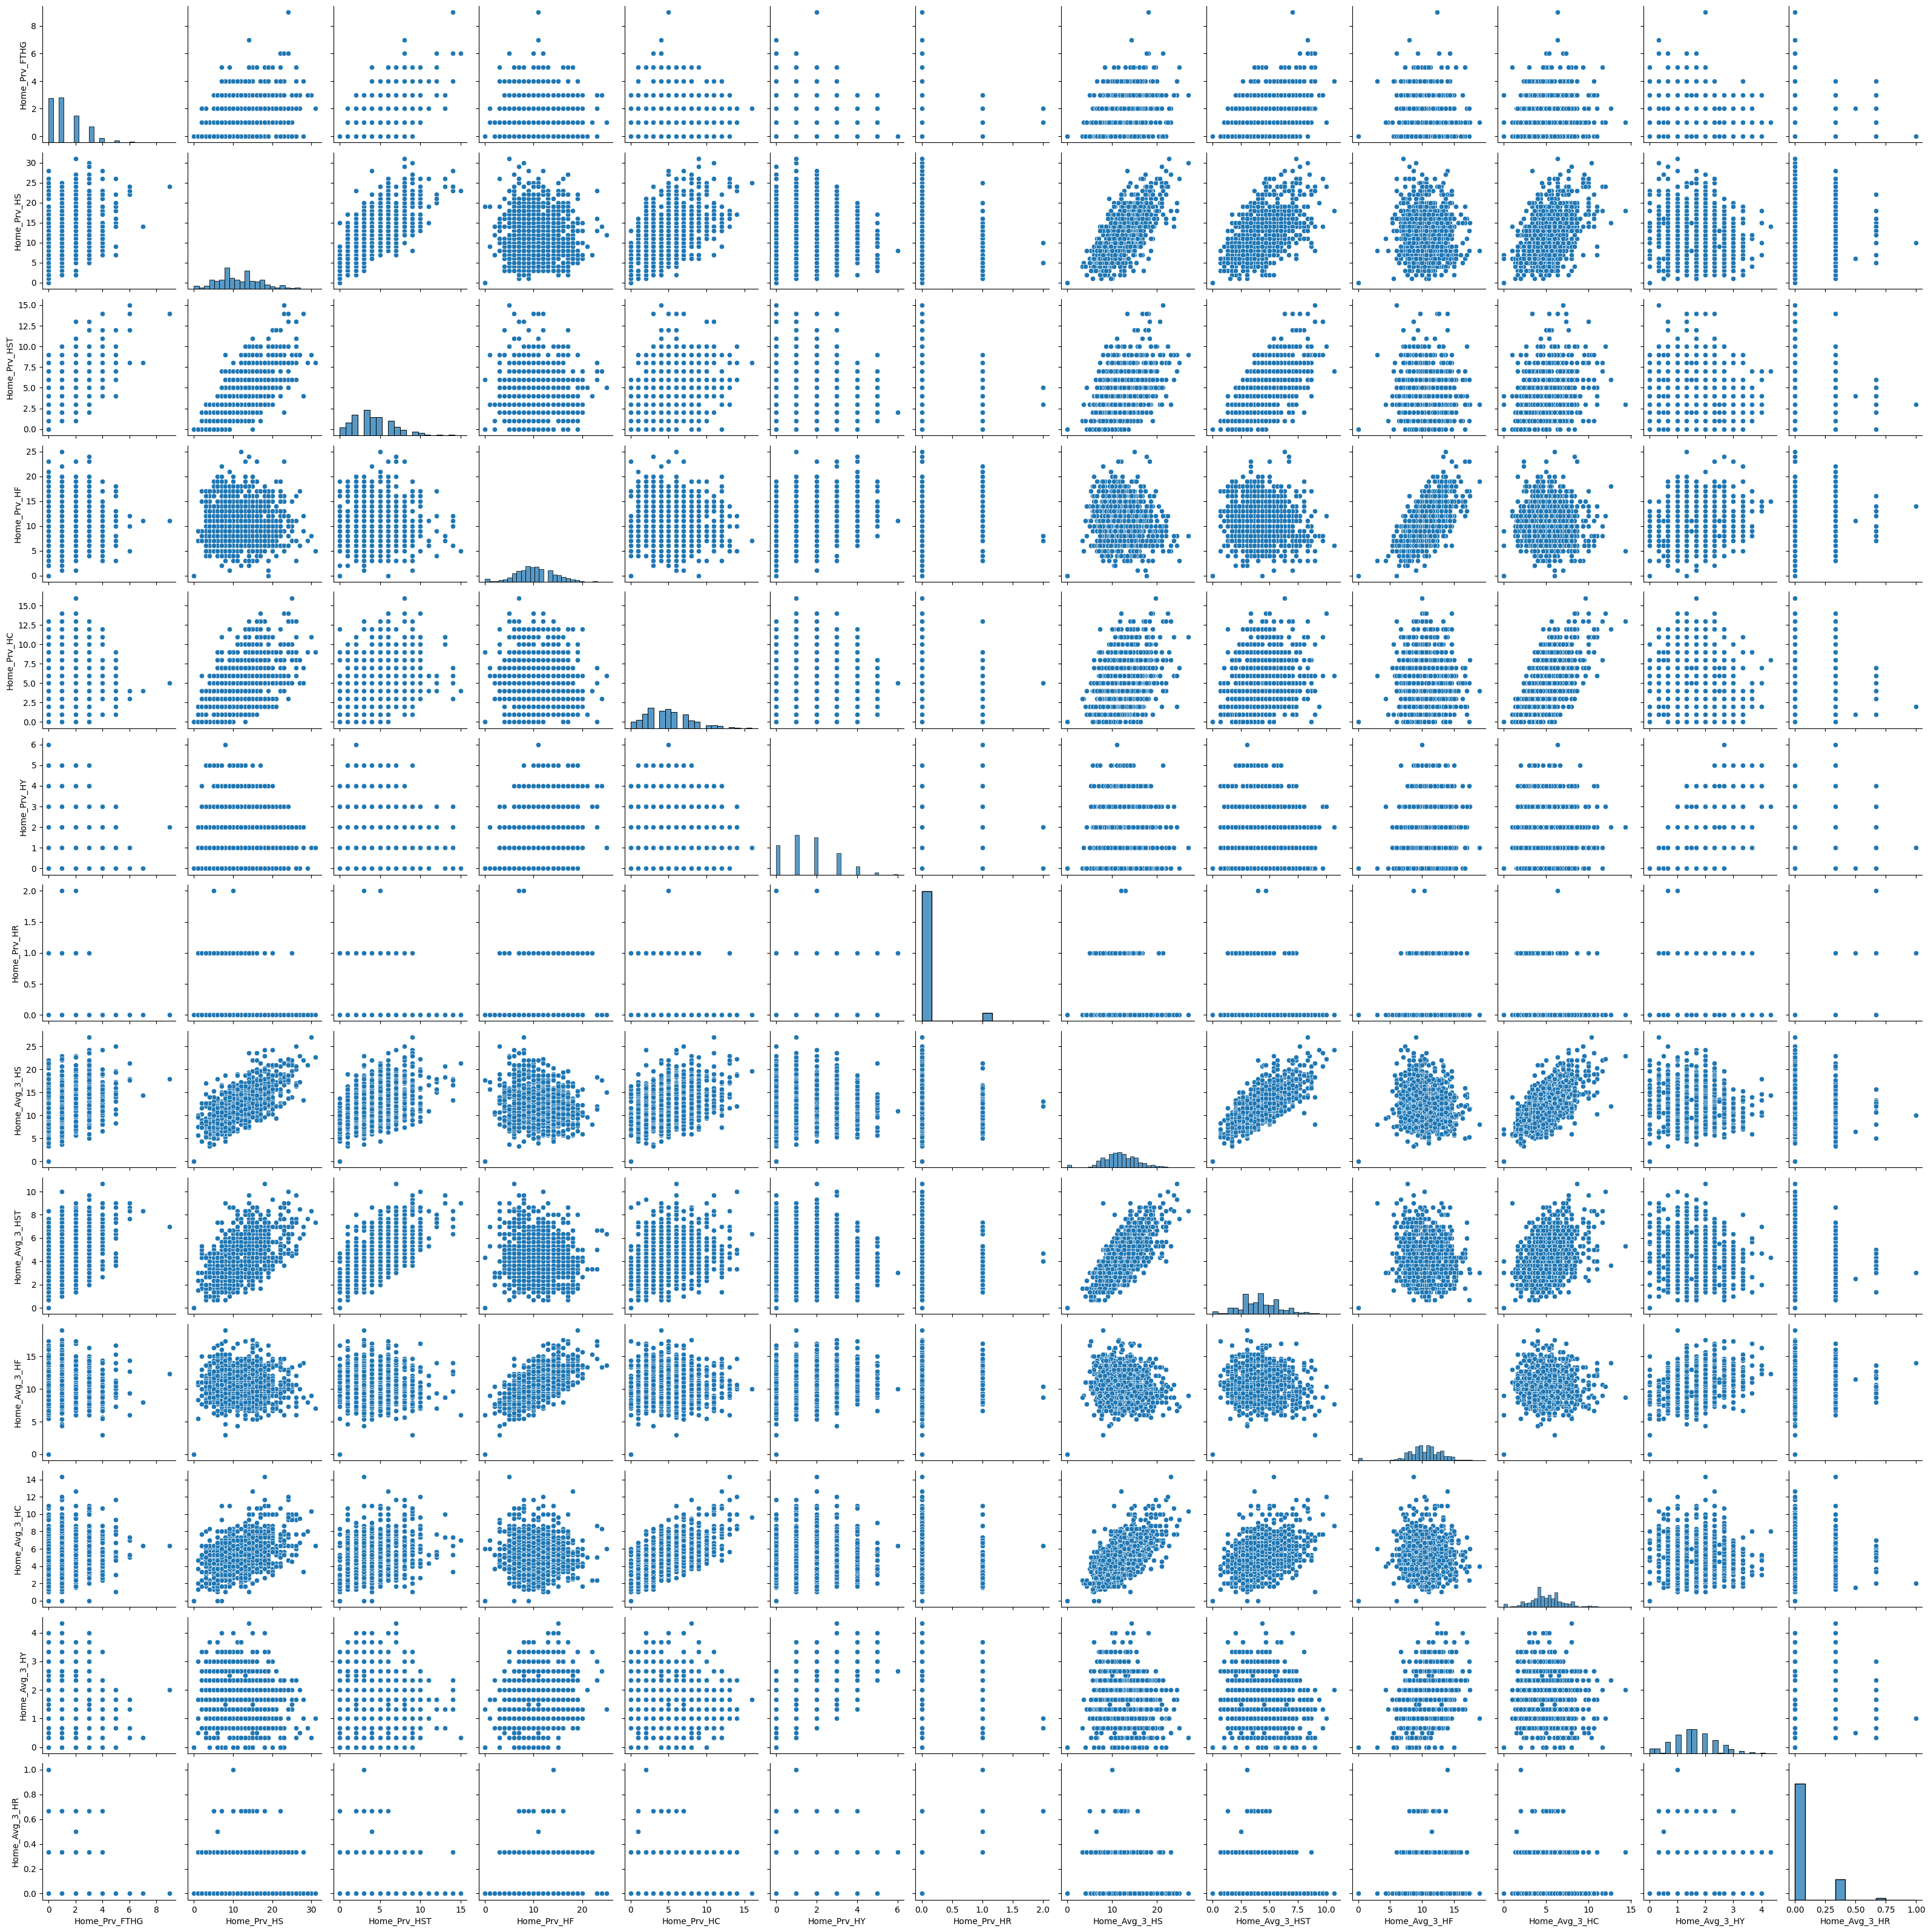

In [156]:
features = ['Home_Prv_FTHG', 
    'Home_Prv_HS', 
    'Home_Prv_HST',
    'Home_Prv_HF', 
    'Home_Prv_HC', 
    'Home_Prv_HY', 
    'Home_Prv_HR',
    # 'Home_Prv_3_FTHG', 
    # 'Away_Prv_FTAG', 
    # 'Away_Prv_AS',
    # 'Away_Prv_AST', 
    # 'Away_Prv_AF', 
    # 'Away_Prv_AC', 
    # 'Away_Prv_AY',
    # 'Away_Prv_AR', 
    # 'Away_Prv_3_FTAG', 
    # 'Home_Team_Rest', 
    # 'Away_Team_Rest',
    # 'Home_Team_Avg_Rest_Last_3', 
    # 'Away_Team_Avg_Rest_Last_3',
    'Home_Avg_3_HS',
    'Home_Avg_3_HST',
    'Home_Avg_3_HF',
    'Home_Avg_3_HC',
    'Home_Avg_3_HY',
    'Home_Avg_3_HR',
    # 'Away_Avg_3_AS',
    # 'Away_Avg_3_AST',
    # 'Away_Avg_3_AF',
    # 'Away_Avg_3_AC',
    # 'Away_Avg_3_AY',
    # 'Away_Avg_3_AR'
    ]
sns.pairplot(df_full[features])

Find number of rows with missing values:

In [70]:
df_used_features = df_full[all_features]
df_used_features.tail(5)

,Temperature,Humidity,WindDirection,Precipitation,WindSpeed,Home_Prv_FTHG,Home_Prv_HS,Home_Prv_HST,Home_Prv_HF,Home_Prv_HC,...,B365A,WHH,WHD,WHA,PSH,PSD,PSA,MaxH,MaxD,MaxA
1135,22.87,35,170,0.0,4.12,2.0,7.0,5.0,13.0,5.0,...,2.25,3.00,3.5,2.25,3.15,3.79,2.24,3.23,3.81,2.35
1136,18.69,62,219,0.0,4.44,1.0,2.0,1.0,7.0,0.0,...,3.80,1.88,3.8,3.75,1.88,4.13,3.91,1.95,4.25,4.00
1137,17.12,72,230,0.2,5.66,2.0,24.0,5.0,6.0,9.0,...,15.00,1.15,7.0,19.00,1.15,8.49,21.36,1.19,8.80,23.00
1138,19.85,64,220,0.0,5.14,2.0,31.0,8.0,5.0,9.0,...,17.00,1.15,7.0,19.00,1.15,8.74,20.27,1.20,9.10,24.00
1139,18.20,49,160,0.0,4.12,1.0,11.0,2.0,10.0,3.0,...,1.25,10.00,6.0,1.25,11.20,6.23,1.27,13.00,7.00,1.29


In [71]:
rows_with_na = df_used_features[df_used_features.isna().any(axis=1)]
rows_with_na.shape

(68, 61)

Drop NA values:

In [72]:
df_cleaned = df_used_features.dropna()

In [73]:
df_cleaned.to_csv('EPL_Final_cleaned_features_without_scaling.csv', index=False)

Get betting odds from vendors:

In [74]:
betting_full = betting_features + id_features
betting_full

['B365H',
 'B365D',
 'B365A',
 'WHH',
 'WHD',
 'WHA',
 'PSH',
 'PSD',
 'PSA',
 'MaxH',
 'MaxD',
 'MaxA',
 'Date',
 'Time',
 'season',
 'HomeTeam',
 'AwayTeam']

Get betting feature for last season:

In [8]:
df_betting_2021_2022 = df_cleaned[df_cleaned['season'] == '2021-2022'][betting_full]


In [9]:
df_betting_2021_2022.head(5)

,B365H,B365D,B365A,WHH,WHD,WHA,PSH,PSD,PSA,MaxH,MaxD,MaxA,Date,Time,season,HomeTeam,AwayTeam
790,2.90,3.5,2.40,2.88,3.25,2.45,2.93,3.48,2.54,2.98,3.56,2.57,2021-09-11,15:00,2021-2022,Southampton,West Ham
791,1.28,5.5,11.00,1.29,5.25,11.00,1.31,5.51,12.17,1.33,5.75,12.94,2021-09-11,17:30,2021-2022,Chelsea,Aston Villa
792,3.40,3.2,2.25,3.30,3.10,2.30,3.47,3.22,2.36,3.48,3.28,2.38,2021-09-11,15:00,2021-2022,Watford,Wolves
793,1.18,7.5,15.00,1.20,6.50,15.00,1.19,7.56,16.42,1.24,7.80,17.00,2021-09-11,15:00,2021-2022,Man United,Newcastle
794,6.00,4.0,1.57,5.80,4.20,1.55,5.87,4.26,1.61,6.15,4.50,1.63,2021-09-11,15:00,2021-2022,Leicester,Man City


In [11]:
df_betting_2021_2022['B365_Pred'] = ((df_betting_2021_2022['B365H'] < df_betting_2021_2022['B365A']) & 
                                     (df_betting_2021_2022['B365H'] < df_betting_2021_2022['B365D'])).astype(int)

df_betting_2021_2022['WH_Pred'] = ((df_betting_2021_2022['WHH'] < df_betting_2021_2022['WHA']) & 
                                   (df_betting_2021_2022['WHH'] < df_betting_2021_2022['WHD'])).astype(int)

df_betting_2021_2022['PS_Pred'] = ((df_betting_2021_2022['PSH'] < df_betting_2021_2022['PSA']) & 
                                   (df_betting_2021_2022['PSH'] < df_betting_2021_2022['PSD'])).astype(int)

df_betting_2021_2022['Max_Pred'] = ((df_betting_2021_2022['MaxH'] < df_betting_2021_2022['MaxA']) & 
                                    (df_betting_2021_2022['MaxH'] < df_betting_2021_2022['MaxD'])).astype(int)

In [12]:
df_betting_2021_2022.head(5)

,B365H,B365D,B365A,WHH,WHD,WHA,PSH,PSD,PSA,MaxH,...,MaxA,Date,Time,season,HomeTeam,AwayTeam,B365_Pred,WH_Pred,PS_Pred,Max_Pred
790,2.90,3.5,2.40,2.88,3.25,2.45,2.93,3.48,2.54,2.98,...,2.57,2021-09-11,15:00,2021-2022,Southampton,West Ham,0,0,0,0
791,1.28,5.5,11.00,1.29,5.25,11.00,1.31,5.51,12.17,1.33,...,12.94,2021-09-11,17:30,2021-2022,Chelsea,Aston Villa,1,1,1,1
792,3.40,3.2,2.25,3.30,3.10,2.30,3.47,3.22,2.36,3.48,...,2.38,2021-09-11,15:00,2021-2022,Watford,Wolves,0,0,0,0
793,1.18,7.5,15.00,1.20,6.50,15.00,1.19,7.56,16.42,1.24,...,17.00,2021-09-11,15:00,2021-2022,Man United,Newcastle,1,1,1,1
794,6.00,4.0,1.57,5.80,4.20,1.55,5.87,4.26,1.61,6.15,...,1.63,2021-09-11,15:00,2021-2022,Leicester,Man City,0,0,0,0


In [17]:
df_betting_2021_2022.to_csv('EPL_Testing_Betting_features.csv', index=False)

Scaling features:

In [75]:
scaler = StandardScaler()
df_cleaned[scale_features] = scaler.fit_transform(df_cleaned[scale_features])

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_29780\4290503892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[scale_features] = scaler.fit_transform(df_cleaned[scale_features])


Encoding features:

In [76]:
df_cleaned = pd.get_dummies(df_cleaned, columns=encode_features)

In [77]:
df_cleaned = df_cleaned.drop(betting_features , axis= 1)

In [78]:
df_cleaned.to_csv('EPL_Final_cleaned_features_v2.csv', index=False)